In [6]:
import os
import numpy as np
import gzip
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Data Exploration

### Read the training data from the gz file. 

In [13]:
def training_images():
    with gzip.open('train-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('train-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels


In [14]:
train_data = training_images()
train_labels = training_labels()

In [15]:
print('Image Data Shape', train_data.shape)
print('Label Data Shape', train_labels.shape)

Image Data Shape (60000, 28, 28)
Label Data Shape (60000,)


#### We can see the Image Data has 3 dimensions, which will not working on the logistic regression. So we need to reshape the Image data to 2D, and fit the logistic regression model.

In [16]:
nsamples, nx, ny = train_data.shape
x_train = train_data.reshape((nsamples,nx*ny))

In [17]:
print('Image Data Shape', x_train.shape)
print('Label Data Shape', train_labels.shape)

Image Data Shape (60000, 784)
Label Data Shape (60000,)


#### We can see that the training dataset has 60000 samples. Here we print out 10 samples to see if the picture and labels are matched.

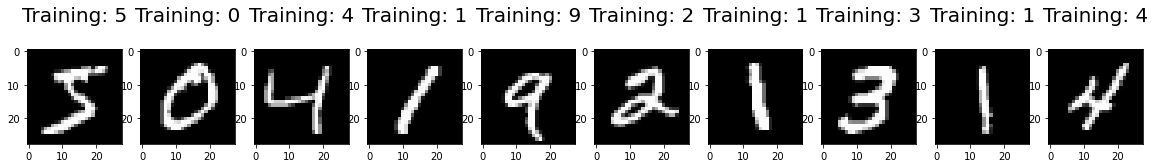

In [18]:
plt.figure(figsize=(20, 4))
for idx, (image, label) in enumerate (zip(x_train[0:10], train_labels[0:10])): 
    plt.subplot(1, 10, idx +1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n'%label, fontsize = 20)

#### Now, we set up our Logistic Regression Model. and fit the training dataset. 

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train, train_labels)

/Users/phoebeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Similarly, we read the test data and reshape the image to 2-D and used the pre-trained model to predict the Labels. 

In [32]:
def test_images():
    with gzip.open('t10k-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
    
def test_labels():
    with gzip.open('t10k-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [33]:
test_data = test_images()
y_test = test_labels()

In [34]:
nsamples, nx, ny = test_data.shape
x_test = test_data.reshape((nsamples,nx*ny))

In [35]:
print('Test Data Shape', x_test.shape)
print('Test Label Data Shape', y_test.shape)

Test Data Shape (10000, 784)
Test Label Data Shape (10000,)


In [38]:
predictions = lr.predict(x_test)

#### To evaluate the preicted accuracy, we can use score or simply compaire the y_test and predictions

In [42]:
#Method 1
accuracy = lr.score(x_test, y_test)
print(accuracy)

0.9255


In [46]:
#Method 2
def accuracy_rate(predictions, y_test): 
    acc = 0
    for i in range(len(predictions)): 
        if predictions[i] == y_test[i]: 
            acc +=1 

    ratio = acc/len(predictions)
    print(ratio)
    
accuracy_rate(predictions, y_test)

0.9255


In [92]:
#Method 3
from sklearn.metrics import accuracy_score
print ("Accuracy = {} %".format(accuracy_score(y_test, predictions)*100))

Accuracy = 92.55 %


#### Now we can use confusion matrics to further inspect the model performance.

In [57]:
from sklearn import metrics

In [102]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]])

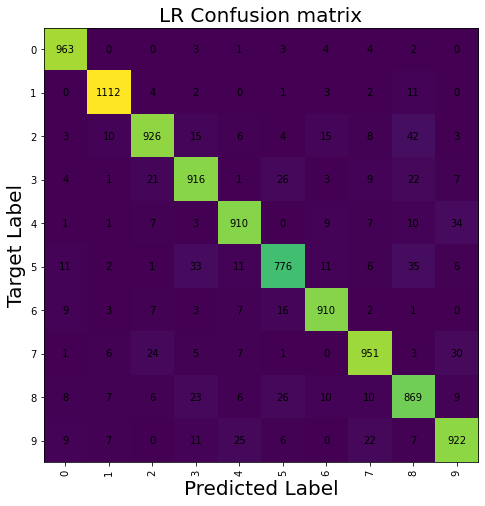

In [104]:
plt.figure(figsize=(8,8))
plt.imshow(cm)
plt.title('LR Confusion matrix', size = 20)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=90, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.ylabel('Target Label', size = 20)
plt.xlabel('Predicted Label', size = 20)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
horizontalalignment='center',
verticalalignment='center')

#### We can see the diagnose represents how many labels are correctly by predicted. Other is just lr models' wrong predictions. 
#### For example, for coordinates: x-axis 0, y-axis 9. It means the model predict the image as number 0, but the 
#### actual labels is 9. 

#### Now we can save our trained ML model to local for the further useage. 

In [45]:
import pickle
 
trained_lr = pickle.dumps(lr)

#Testing if the loaded ML model works
lr_from_pickle = pickle.loads(trained_lr) 

#Write to local 
with open('lr.model', 'wb') as files:
    pickle.dump(lr, files)

### Mathod#2 Naive Bays 

#### Similarly, we need to set up model first and then fit the training dataset. Sklearn has multiple Naive Bays package, I'm trying to find out which one is the best for predicting the digits number.

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
cnb = ComplementNB()

In [95]:
mnb.fit(x_train, train_labels)
gnb.fit(x_train, train_labels)
bnb.fit(x_train, train_labels)
cnb.fit(x_train, train_labels)

ComplementNB()

In [ ]:
from sklearn.metrics import accuracy_score

In [96]:
### Getting Each Accuracy 
y_predicted_1 = mnb.predict(x_test)
y_predicted_2 = gnb.predict(x_test)
y_predicted_3 = bnb.predict(x_test)
y_predicted_4 = cnb.predict(x_test)

print ("Accuracy for Multinomia NB = {} %".format(accuracy_score(y_test, y_predicted_1)*100))
print ("Accuracy for Gaussian NB = {} %".format(accuracy_score(y_test, y_predicted_2)*100))
print ("Accuracy for Bernoulli NB = {} %".format(accuracy_score(y_test, y_predicted_3)*100))
print ("Accuracy for Complement NB = {} %".format(accuracy_score(y_test, y_predicted_4)*100))

Accuracy for Multinomia NB = 83.65 %
Accuracy for Gaussian NB = 55.58 %
Accuracy for Bernoulli NB = 84.13000000000001 %
Accuracy for Complement NB = 72.85000000000001 %


#### We can see Bernoulli NB performance the best, the Multinomial NV also getting a good score. Let's inspect their 
#### confusion matrix

In [109]:
cm2 = metrics.confusion_matrix(y_test, y_predicted_1)
cm2

array([[ 912,    0,    2,    6,    1,    8,   14,    1,   36,    0],
       [   0, 1061,    5,    9,    0,    2,    6,    0,   51,    1],
       [  15,   11,  858,   24,   10,    3,   33,   11,   66,    1],
       [   4,   11,   34,  851,    1,   21,    7,   14,   40,   27],
       [   2,    2,    6,    0,  732,    0,   25,    1,   38,  176],
       [  23,   11,    6,  107,   18,  590,   17,    6,   78,   36],
       [  17,   13,   17,    1,    7,   25,  860,    0,   18,    0],
       [   1,   21,   11,    5,   19,    0,    1,  861,   40,   69],
       [   6,   26,   13,   54,   14,   27,    8,    9,  777,   40],
       [   6,    7,    3,   10,   66,   10,    0,   17,   27,  863]])

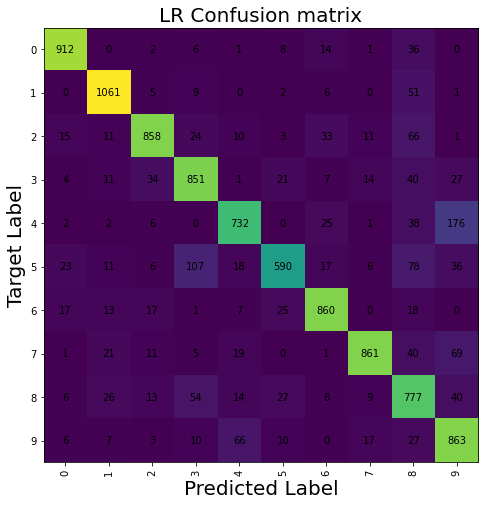

In [110]:
plt.figure(figsize=(8,8))
plt.imshow(cm2)
plt.title('LR Confusion matrix', size = 20)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=90, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.ylabel('Target Label', size = 20)
plt.xlabel('Predicted Label', size = 20)
width, height = cm2.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm2[x][y]), xy=(y, x), 
horizontalalignment='center',
verticalalignment='center')

In [111]:
cm3 = metrics.confusion_matrix(y_test, y_predicted_3)
cm3

array([[ 887,    0,    4,    7,    2,   41,   16,    1,   22,    0],
       [   0, 1085,   10,    5,    0,    9,    6,    0,   19,    1],
       [  19,    8,  852,   29,   17,    4,   32,   14,   55,    2],
       [   5,   15,   34,  844,    0,   13,    9,   15,   49,   26],
       [   2,    6,    4,    0,  795,    4,   21,    1,   23,  126],
       [  23,   12,    7,  129,   30,  627,   16,    8,   21,   19],
       [  18,   18,   15,    2,   13,   35,  851,    0,    6,    0],
       [   1,   24,   14,    4,   15,    0,    0,  871,   27,   72],
       [  16,   23,   13,   76,   17,   22,    7,    6,  758,   36],
       [   9,   13,    5,    9,   74,    8,    0,   24,   24,  843]])

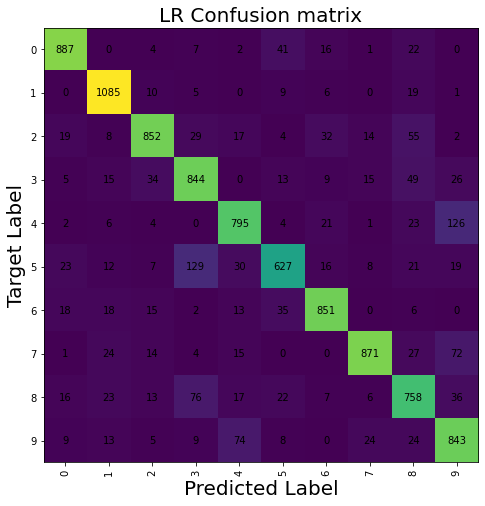

In [113]:
plt.figure(figsize=(8,8))
plt.imshow(cm3)
plt.title('LR Confusion matrix', size = 20)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=90, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.ylabel('Target Label', size = 20)
plt.xlabel('Predicted Label', size = 20)
width, height = cm3.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm3[x][y]), xy=(y, x), 
horizontalalignment='center',
verticalalignment='center')

#### Now we can save our traine model

In [101]:
import pickle
 
#Write to local 
with open('nb.model', 'wb') as files:
    pickle.dump(bnb, files)